# Aggregation & Visuzalization
* We have 110 scores for different metrics (BLEU, chrF, BERT-F1, COMET)
* We have 110 scores for different translators (DeepL, GPT4.1)
* We have 110 scores for different datasets (EuroParl, Flores+), 20 scores for OPUS100

This allows us to compute score matrices with source languages as rows and target languages as columns as in [Koehn's paper](https://aclanthology.org/2005.mtsummit-papers.11/), however, to get menaingful insights out of these scores, we have to aggregate them; compute statistics and visualize them in a way to make insights more visible.

In [1]:
from scripts.presentation import Presenter
from os.path import join

# Contains aligned results (aligned + sentence split with bertalign)
results_folder = 'post_results'
p = Presenter(results_folder=results_folder, metrics=['BLEU', 'chrF'])

## Translator Correlations
* I.e., if DeepL has high BLEU score for a given pair, so does GPT4.1 and vice versa.

In [2]:
datasets = ['ep', 'flores', 'opus']
translators = ['deepl', 'gpt']

for d in datasets:
        key1 = f'{d}-deepl'
        key2 = f'{d}-gpt'
        p.show_correlations(
            key1=key1, key2=key2, metric1='BLEU', metric2='BLEU')

Keys: ep-deepl : ep-gpt
Metrics: BLEU : BLEU
Pearson correlation: 0.93 (p = 1.9e-48)
Spearman correlation: 0.93 (p = 2.0e-47)

Keys: flores-deepl : flores-gpt
Metrics: BLEU : BLEU
Pearson correlation: 0.96 (p = 2.0e-63)
Spearman correlation: 0.96 (p = 2.6e-59)

Keys: opus-deepl : opus-gpt
Metrics: BLEU : BLEU
Pearson correlation: 0.96 (p = 1.5e-11)
Spearman correlation: 0.94 (p = 9.8e-10)



## BLEU & chrF correlations
* If BLEU score is high, so is chrF

In [3]:
datasets = ['ep', 'flores', 'opus']
translators = ['deepl', 'gpt']

for d in datasets:
    for t in translators:
        key = f'{d}-{t}'
        p.show_correlations(key1=key, key2=key, metric1='BLEU', metric2='chrF')

Keys: ep-deepl : ep-deepl
Metrics: BLEU : chrF
Pearson correlation: 0.83 (p = 1.3e-29)
Spearman correlation: 0.83 (p = 3.1e-29)

Keys: ep-gpt : ep-gpt
Metrics: BLEU : chrF
Pearson correlation: 0.87 (p = 1.6e-34)
Spearman correlation: 0.89 (p = 3.1e-39)

Keys: flores-deepl : flores-deepl
Metrics: BLEU : chrF
Pearson correlation: 0.94 (p = 5.5e-53)
Spearman correlation: 0.92 (p = 4.5e-46)

Keys: flores-gpt : flores-gpt
Metrics: BLEU : chrF
Pearson correlation: 0.95 (p = 8.5e-55)
Spearman correlation: 0.93 (p = 4.7e-49)

Keys: opus-deepl : opus-deepl
Metrics: BLEU : chrF
Pearson correlation: 0.85 (p = 2.2e-06)
Spearman correlation: 0.87 (p = 8.0e-07)

Keys: opus-gpt : opus-gpt
Metrics: BLEU : chrF
Pearson correlation: 0.88 (p = 4.1e-07)
Spearman correlation: 0.87 (p = 4.9e-07)



## Visualizations
* We observe that the data from EuroParl - DeepL has the lowest BLEU-chrF correlation, we can inspect this visually using linear regression.

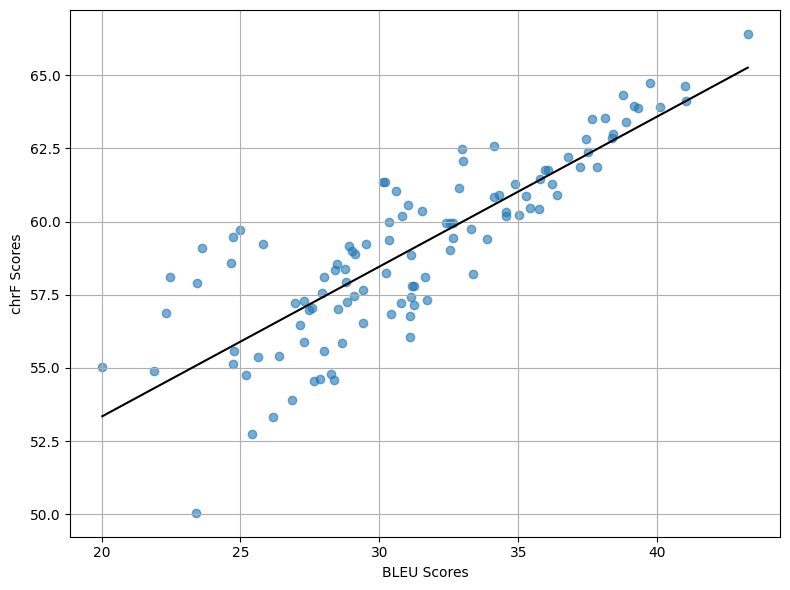

In [4]:
key = 'ep-deepl'
x_vals, y_vals, model, labels = p.prep_lin_reg_1(key1=key, key2=key, metric1='BLEU', metric2='chrF')
p.basic_linear_regression(x_vals, y_vals, x_label='BLEU Scores', y_label='chrF Scores', model=model)

In [5]:
outliers = p.analyse_residuals(x_vals=x_vals, y_vals=y_vals, model=model, top_n=20, labels=labels)

sv-fi 22.32, 56.87
es-de 32.98, 62.50
fr-el 27.63, 54.55
sv-el 27.85, 54.63
da-el 28.26, 54.79
el-de 30.21, 61.36
pt-fi 23.42, 57.89
fr-de 30.13, 61.37
de-fi 24.67, 58.59
da-fi 25.82, 59.23
de-el 26.85, 53.89
nl-es 31.11, 56.04
nl-pt 28.38, 54.58
it-el 26.17, 53.31
fi-el 25.41, 52.74
fr-fi 22.45, 58.09
en-fi 24.71, 59.46
es-fi 24.99, 59.71
el-fi 23.62, 59.11
nl-el 23.42, 50.05


In [6]:
from scripts.presentation import lang_freq
_ = lang_freq(outliers) # looks for the top 3 most frequent languages
for k, v in _.items():
    print(f'{k:<10}{v}')

to-fi     8
to-el     7
to-de     3
from-fr   3
from-nl   3
from-sv   2
from-es   2
from-da   2
from-el   2
from-de   2
from-pt   1
to-es     1
to-pt     1
from-it   1
from-fi   1
from-en   1


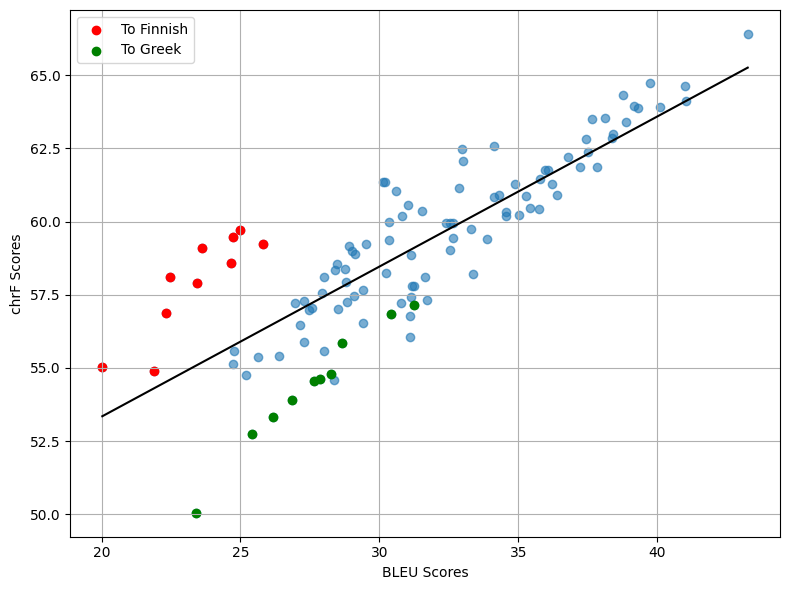

In [7]:
mark_func = p.mark_by_language_direction(labels=labels, x_vals=x_vals, y_vals=y_vals, to_langs=[('fi', 'red'), ('el', 'green')])
p.basic_linear_regression(x_vals=x_vals, y_vals=y_vals, x_label='BLEU Scores', y_label='chrF Scores',
                          model=model, mark_func=mark_func)

* We observe a similar pattern with the residuals for all cases:

ep-deepl


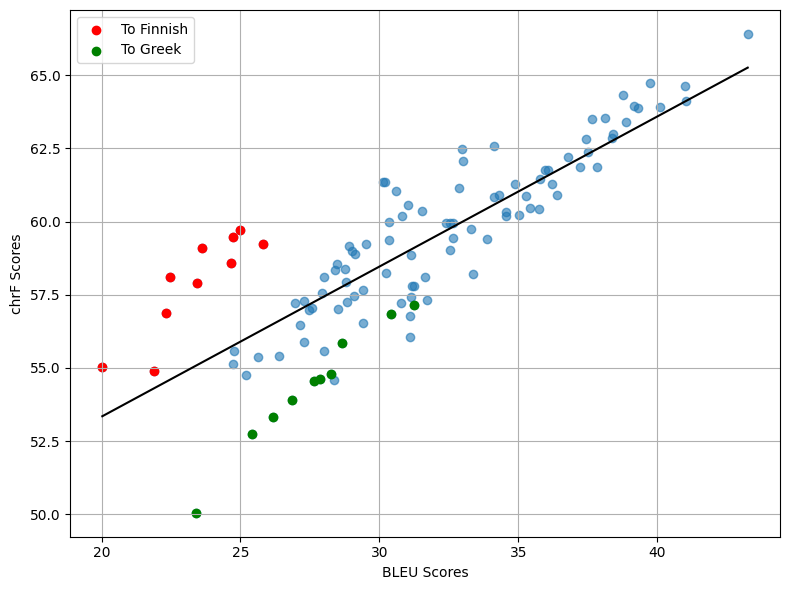

ep-gpt


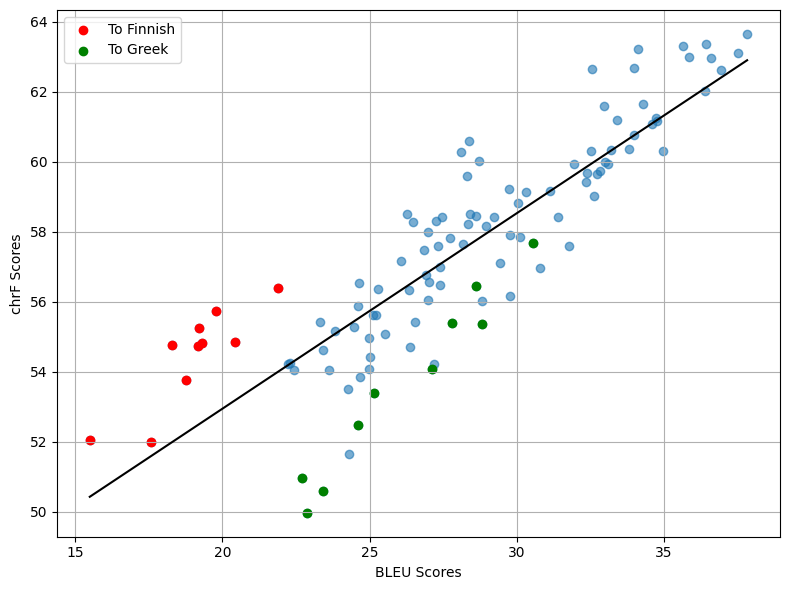

flores-deepl


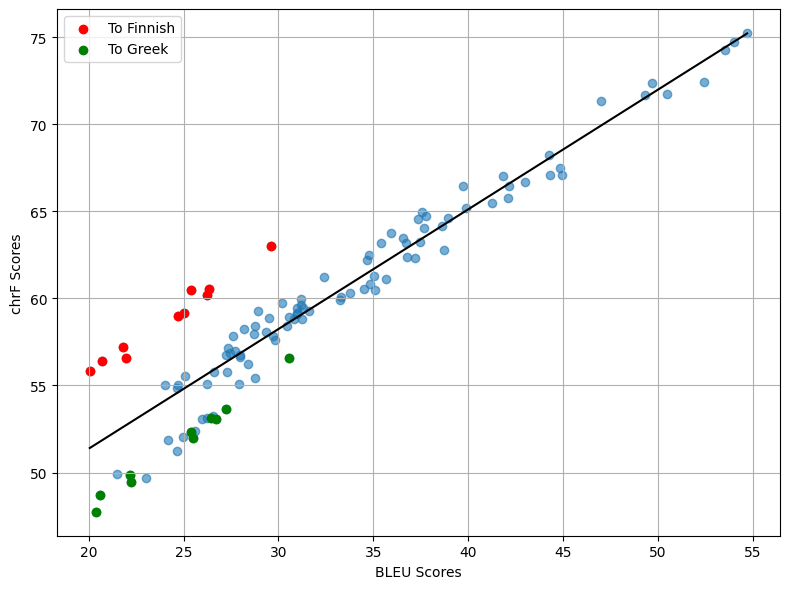

flores-gpt


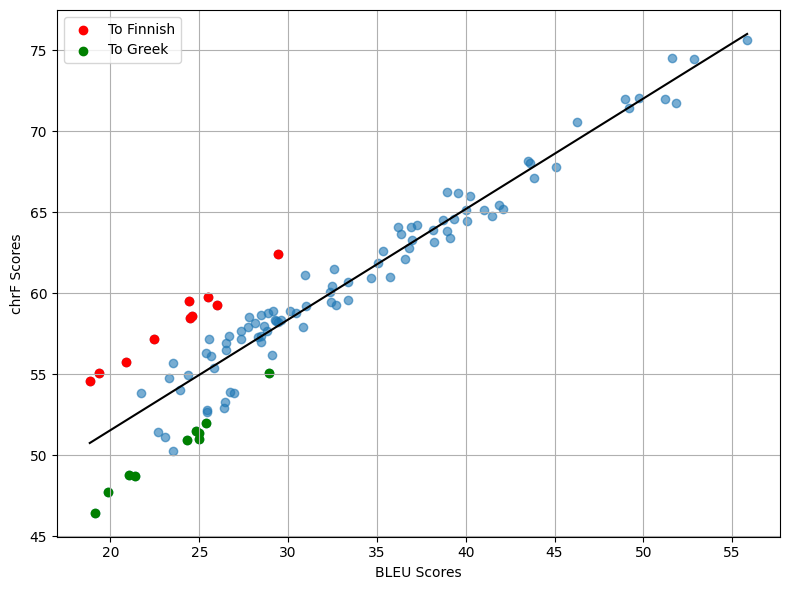

In [8]:
keys = ['ep-deepl', 'ep-gpt', 'flores-deepl', 'flores-gpt']
for key in keys:
    x_vals, y_vals, model, labels = p.prep_lin_reg_1(
        key1=key, key2=key, metric1='BLEU', metric2='chrF')
    
    mark_func = p.mark_by_language_direction(
        labels=labels, x_vals=x_vals, y_vals=y_vals, to_langs=[('fi', 'red'), ('el', 'green')])

    print(key)
    p.basic_linear_regression(
        x_vals, y_vals, x_label='BLEU Scores', y_label='chrF Scores', model=model, mark_func=mark_func)

## Matrices
* We use heatmaps to make it more visible where scores are higher/lower
* We use a linguistically sensible order of languages, namely:
    * da, sv: North Germanic languages
    * de, nl: West Germanic languages
    * en: Either Germanic/Romantic, so we put it between
    * es, fr, it, pt: Romantic languages
    * el: Helenic language
    * fi: Uralic language
* Using this order and heatmaps makes it easier to see emerging patterns, such as similar cluster/colors for language families.

ep-deepl


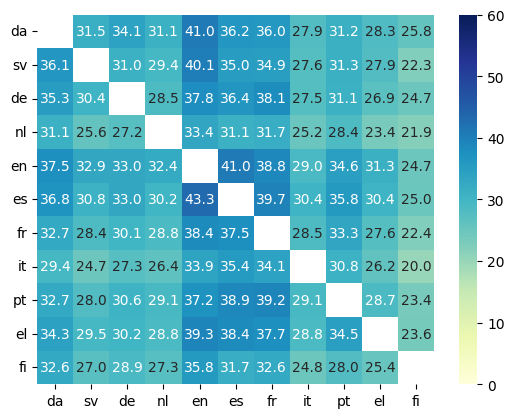


ep-gpt


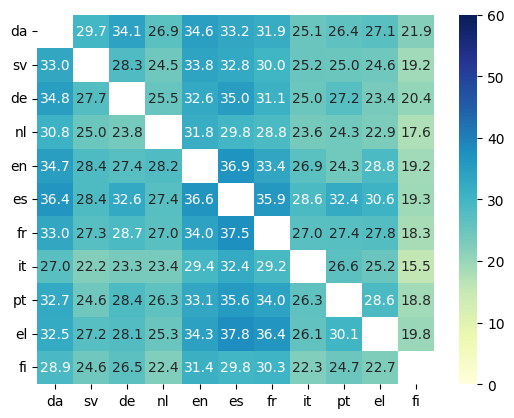


flores-deepl


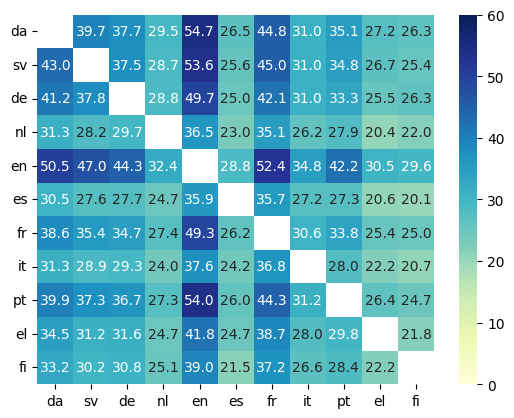


flores-gpt


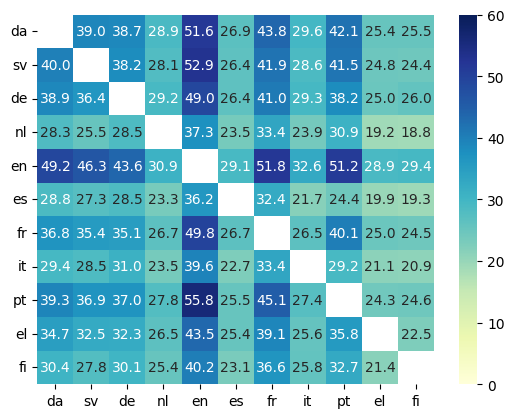


opus-deepl


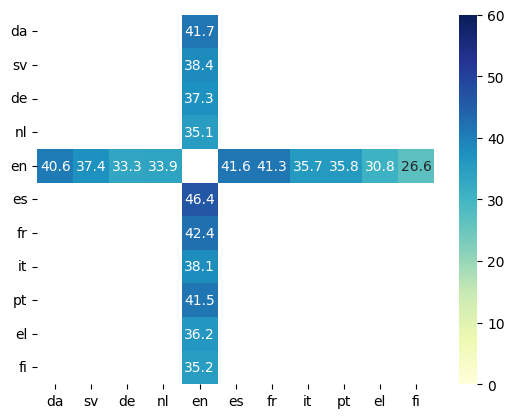


opus-gpt


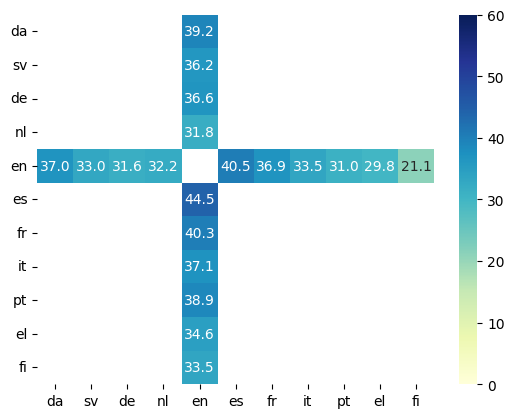

In [9]:
p.show_score_matrices(metric='BLEU')

* If we look at data from the EuroParl corpus specifically, we observe that the romantic languages are on the higher end, specifically English, French and Spanish.

ep-deepl


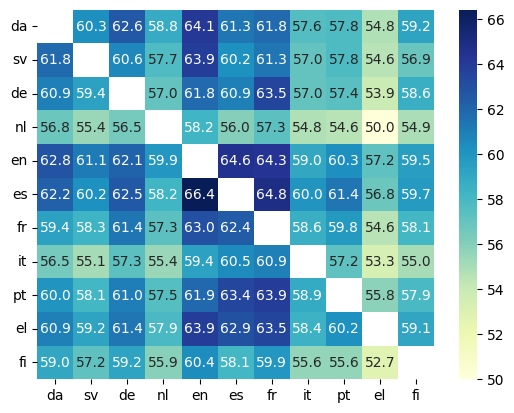


ep-gpt


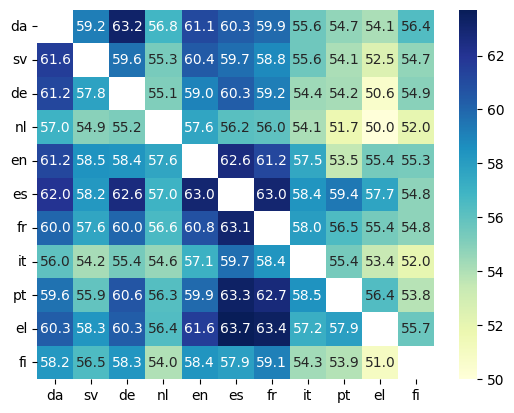


flores-deepl


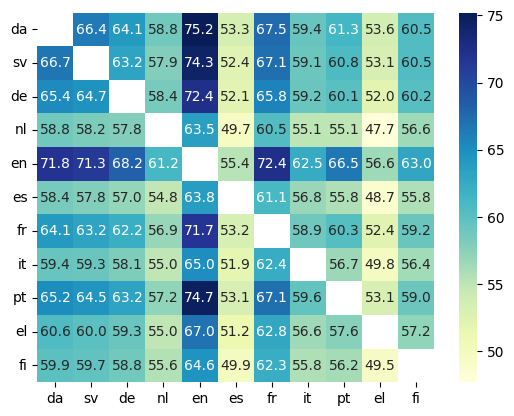


flores-gpt


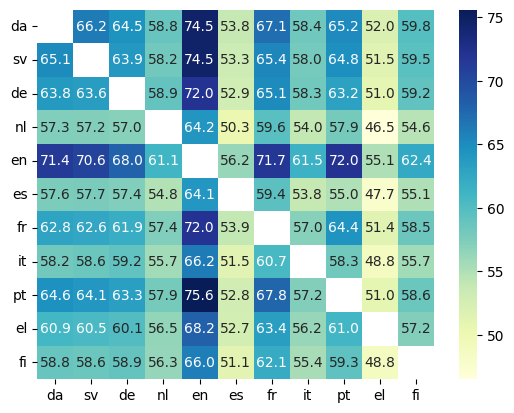


opus-deepl


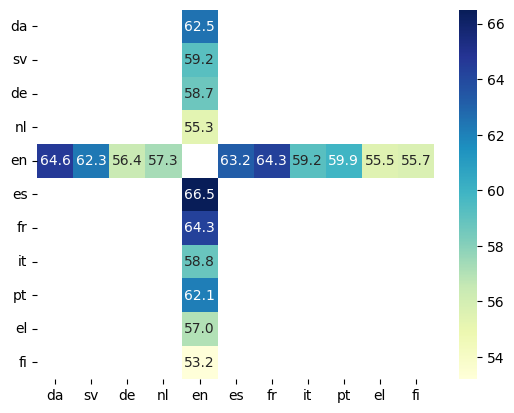


opus-gpt


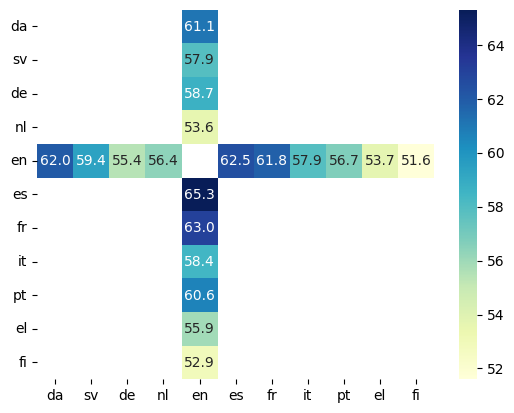

In [10]:
p.show_score_matrices(metric='chrF')

* The English, Spanish, French trio, at least in EuroParl has higher scores
* Both chrF and BLEU show a drop in quality for Spanish when going from EuroParl to Flores+
* While for BLEU, Finnish is lowest, for chrF, Greek is lowest. Shows the differences between the metrics.

## Aggregations
* We reduce 110 scores to 11 by taking their averages and then compare them with Koehn's scores
* We can either take the average of the rows (translating from language) or over the columns (translating into language)
* We can also take the difference between these averages.
* This was done in Koehn's paper and presented in table format, however, since we have different types of scores, we opted to present it more in visual fashion


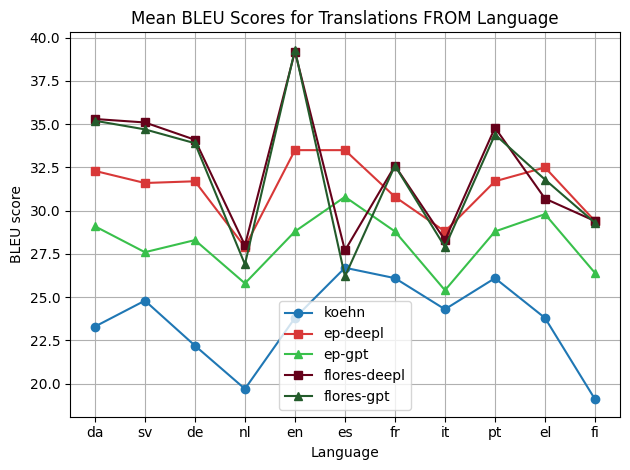

In [11]:
_ = p.mean_metric_from_or_into_lang(plot=True, mode='FROM')

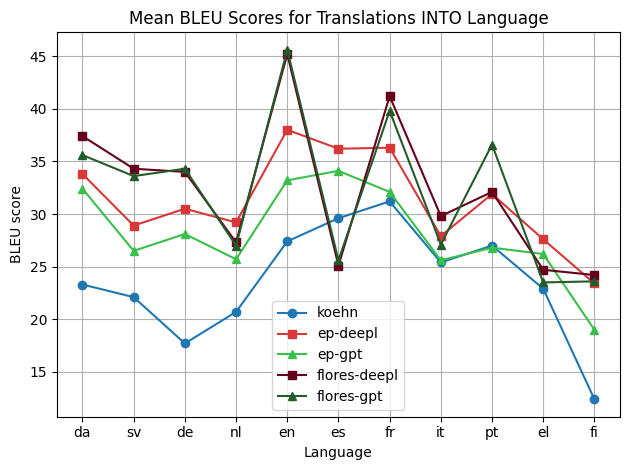

In [12]:
_ = p.mean_metric_from_or_into_lang(plot=True, mode='INTO')

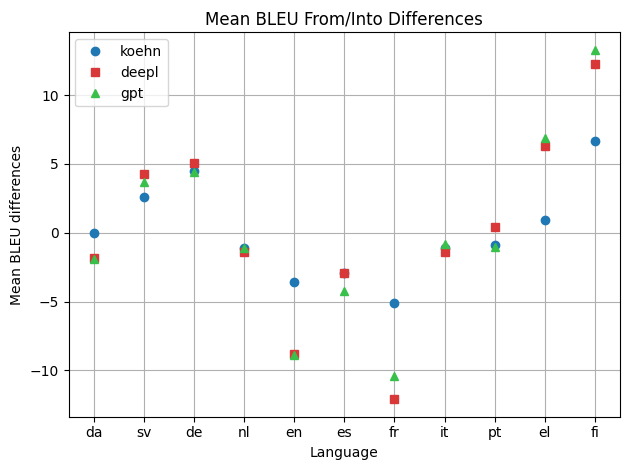

In [13]:
_ = p.mean_metric_from_or_into_lang(plot=True, mode='DIFF', merge='TRANSLATOR')

In [14]:
_

,koehn,deepl,gpt
lang,,,
da,0.0,-1.8,-1.9
sv,2.6,1.7,1.1
de,4.5,0.6,-0.1
nl,-1.1,-0.3,0.0
en,-3.6,-5.2,-5.3
es,-2.9,-0.0,-1.3
fr,-5.1,-7.0,-5.3
it,-1.1,-0.3,0.3
pt,-0.9,1.3,-0.1


* We observe an overall improvement in translation quality as we compare SMT used by Koehn with DeepL and GPT
* The quality seems to depend on the dataset as well, with Flores+ having higher scores (more or less)
* We observe also general tendencies, such as higher quality for romantic languages, these tendencies, at least for EuroParl, were more or less preserved.
* If we look at the From/Into Differences, positive = easier to translate from, negative = easier to translate into, we observe stark differences based on translator & datasets

## Score Analysis
* Instead of means of scores, we can also analyse scores directly
* Allows us to include OPUS100 in some cases.

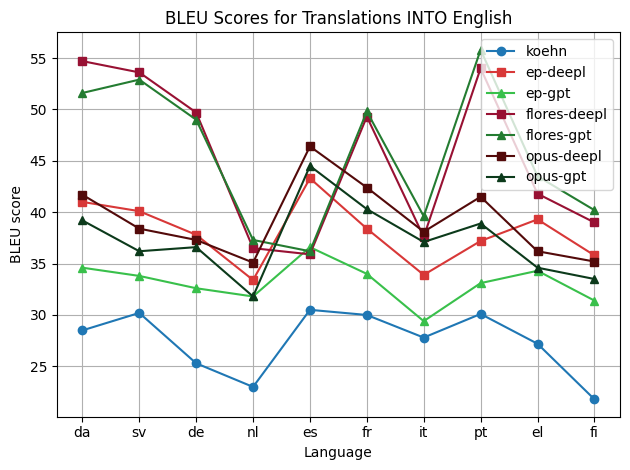

In [15]:
_ = p.metric_from_or_into_language(plot=True)

* We observe an interesting pattern of OPUS100 being about between FLORES+ and EuroParl
* Can be confirmed by checking the mean of the resp. `pandas.DataFrame`

In [16]:
_.mean().drop('koehn')

ep-deepl        10.58
ep-gpt           5.72
flores-deepl    17.77
flores-gpt      18.15
opus-deepl      11.79
opus-gpt         9.83
dtype: float64

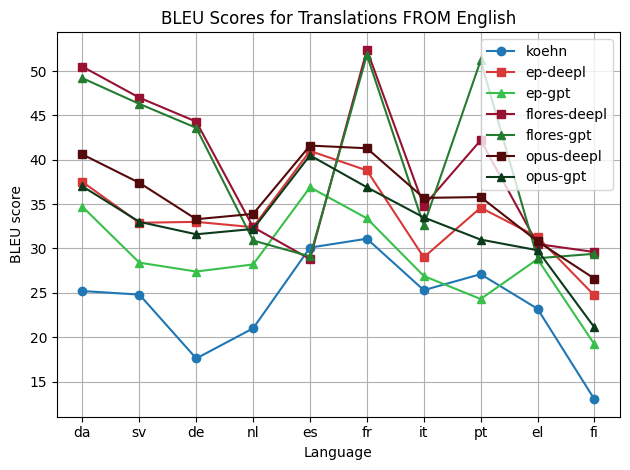

In [17]:
_ = p.metric_from_or_into_language(plot=True, mode='FROM')

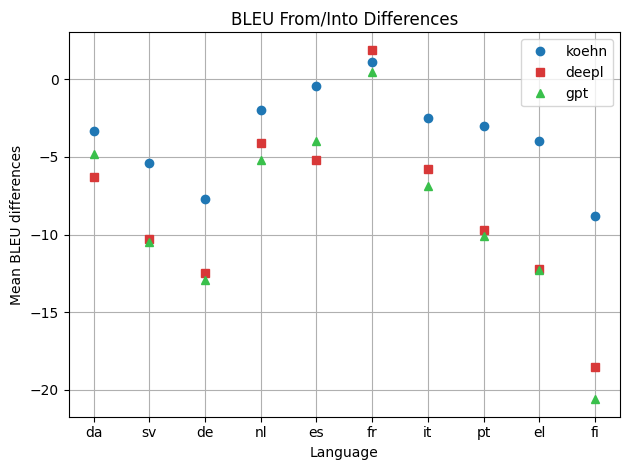

In [18]:
_ = p.metric_from_or_into_language(plot=True, mode='DIFF', merge='TRANSLATOR')

## Comet & BERT-F1

In [19]:
from scripts.presentation import Presenter
from os.path import join

# Contains aligned results (aligned + sentence split with bertalign)
results_folder = 'bert_comet'
p = Presenter(results_folder=results_folder, metrics=['BLEU', 'chrF', 'BERT-F1', 'COMET'])

In [20]:
keys = ['ep-deepl', 'ep-gpt']
for key in keys:
    p.show_correlations(key1=key, key2=key, metric1='BLEU', metric2='COMET')

Keys: ep-deepl : ep-deepl
Metrics: BLEU : COMET
Pearson correlation: -0.41 (p = 8.5e-06)
Spearman correlation: -0.34 (p = 2.3e-04)

Keys: ep-gpt : ep-gpt
Metrics: BLEU : COMET
Pearson correlation: -0.35 (p = 2.2e-04)
Spearman correlation: -0.25 (p = 8.5e-03)



ep-deepl


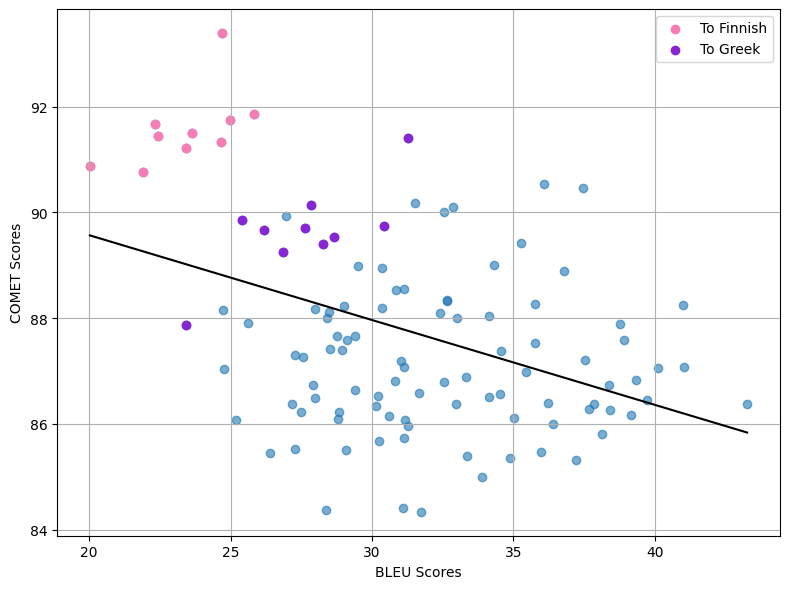

ep-gpt


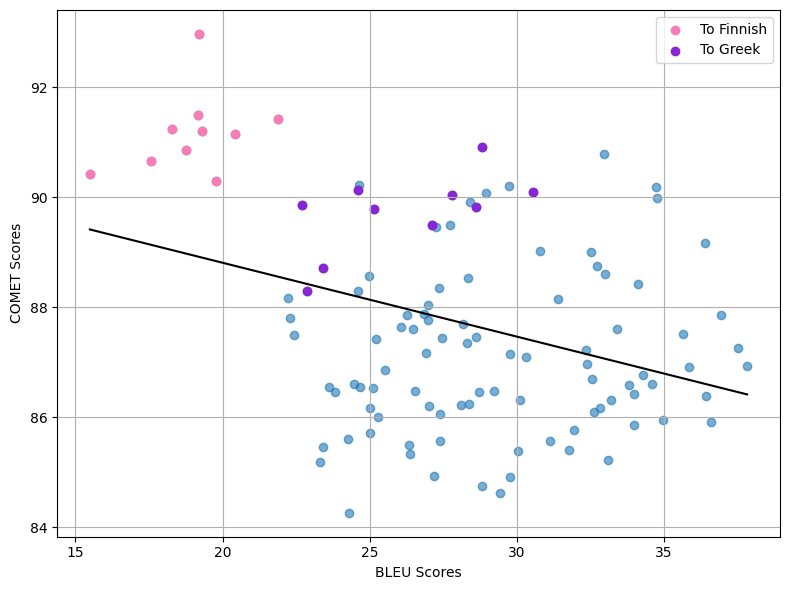

In [21]:
keys = ['ep-deepl', 'ep-gpt']
for key in keys:
    x_vals, y_vals, model, labels = p.prep_lin_reg_1(
        key1=key, key2=key, metric1='BLEU', metric2='COMET')
    mark_func = p.mark_by_language_direction(
        labels=labels, x_vals=x_vals, y_vals=y_vals, to_langs=[('fi', "#F87DB5"), ('el', "#8825D4")])

    print(key)
    p.basic_linear_regression(
        x_vals, y_vals, x_label='BLEU Scores', y_label='COMET Scores', model=model, mark_func=mark_func)

ep-deepl


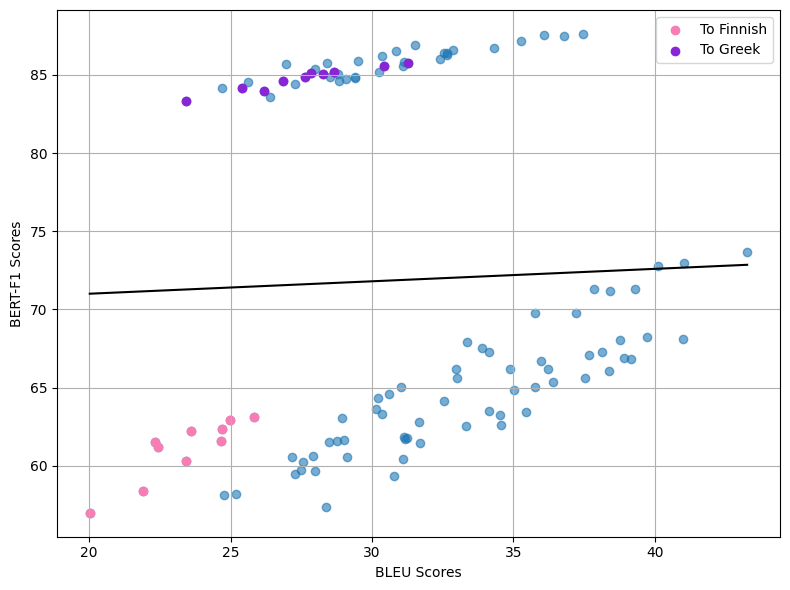

ep-gpt


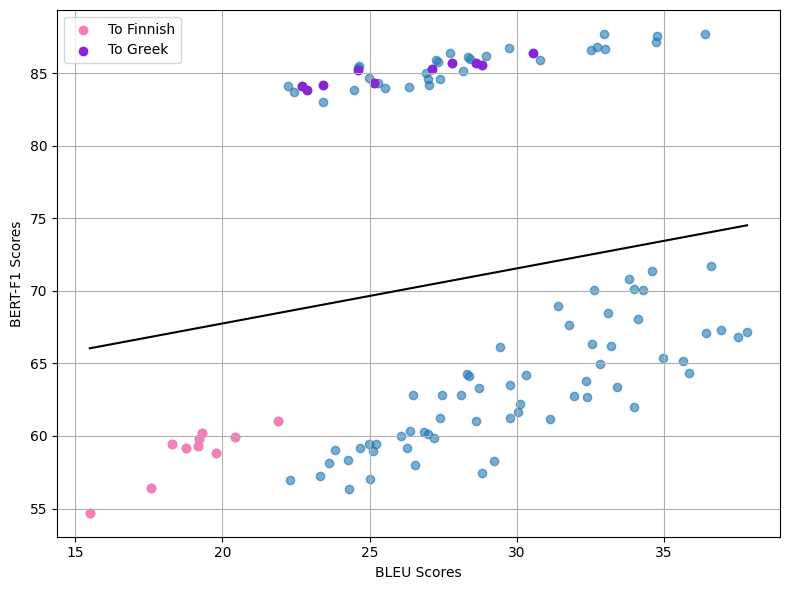

In [22]:
keys = ['ep-deepl', 'ep-gpt']
for key in keys:
    x_vals, y_vals, model, labels = p.prep_lin_reg_1(
        key1=key, key2=key, metric1='BLEU', metric2='BERT-F1')
    mark_func = p.mark_by_language_direction(
        labels=labels, x_vals=x_vals, y_vals=y_vals, to_langs=[('fi', "#F87DB5"), ('el', "#8825D4")])

    print(key)
    p.basic_linear_regression(
        x_vals, y_vals, x_label='BLEU Scores', y_label='BERT-F1 Scores', model=model, mark_func=mark_func)

## Comparing Translators & Datasets
* We can look at the correlation between translators and mark the datasets to see if there are differences

In [23]:
results_folder = 'post_results'
p = Presenter(results_folder=results_folder, metrics=['BLEU', 'chrF'])

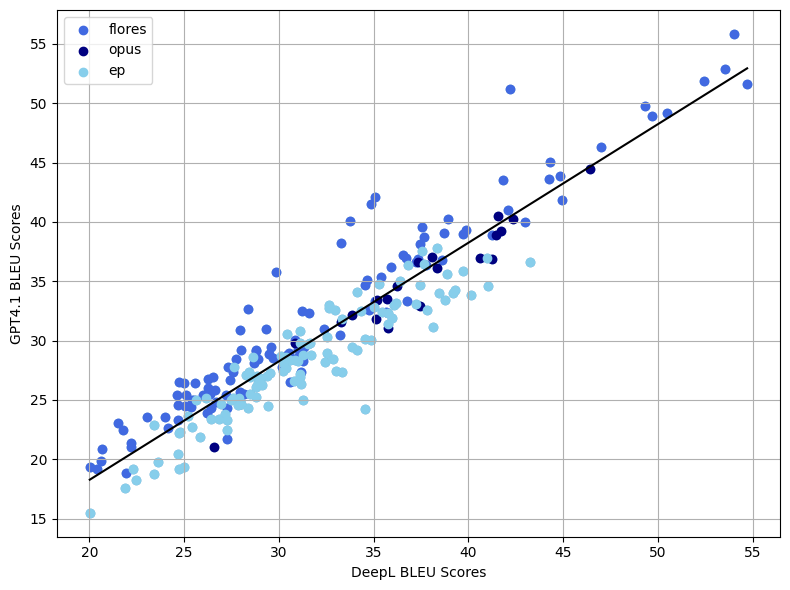

In [24]:
x_vals, y_vals, model, labels, mf = p.prep_lin_reg_2(
    metric1='BLEU', metric2='BLEU')
p.basic_linear_regression(x_vals, y_vals, x_label='DeepL BLEU Scores',
                          y_label='GPT4.1 BLEU Scores', model=model, mark_func=mf)

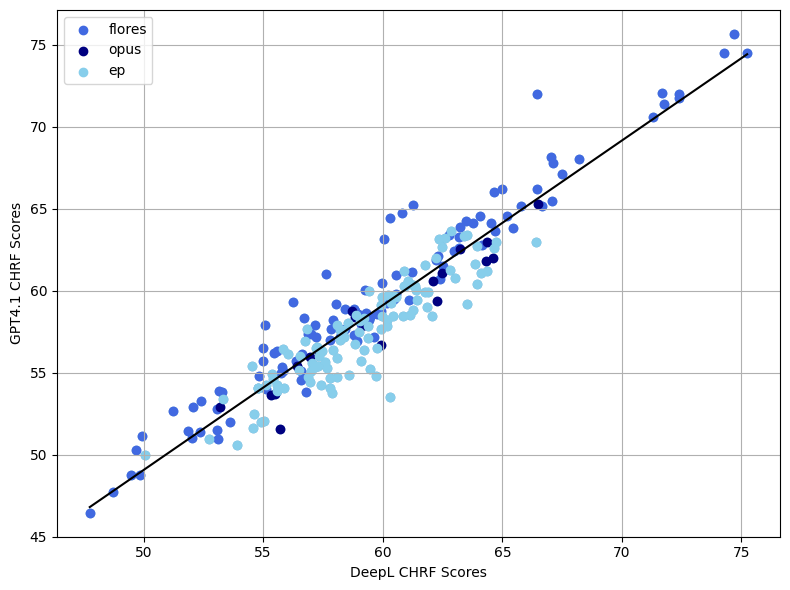

In [25]:
x_vals, y_vals, model, labels, mf = p.prep_lin_reg_2(
    metric1='chrF', metric2='chrF')
p.basic_linear_regression(x_vals, y_vals, x_label='DeepL CHRF Scores',
                          y_label='GPT4.1 CHRF Scores', model=model, mark_func=mf)